## Monitoring the number of MPs who are interested in different topics

In [2]:
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
wpqs = pd.read_csv('ua_pqs_cleaned.csv')
wpqs['cleanedQuestion'].fillna('', inplace=True)
wpqs['topic'].fillna('', inplace=True)
wpqs['dateTabled'] = pd.to_datetime(wpqs.dateTabled)

In [4]:
wpqs.dateTabled.max()

Timestamp('2022-09-26 00:00:00')

#### Most popular topics of all time

### Most popular topics by number of MPs. 

To look at this, we need to limit our data to the current Parliament, which first sat in January 2020. 

In [5]:
pqs_sel = wpqs[wpqs.dateTabled > '2020-01-01']
pqs_sel = pqs_sel[pqs_sel.house == 'Commons']
pqs_sel = pqs_sel[pqs_sel.topic != '']

In [6]:
# Most popular topics every
topics_members = pqs_sel.groupby(['topic', 'askingMemberId']).count().id.reset_index().groupby('topic').nunique().sort_values('askingMemberId')[['askingMemberId']]

In [7]:
topics_members[topics_members.askingMemberId > 100].T

topic,buildings,private rented housing,passports,china,transport,migrant workers,kickstart scheme,universities,dementia,driving tests,...,coronavirus job retention scheme,railways,social security benefits,children,business,universal credit,nhs,housing,schools,coronavirus
askingMemberId,102,102,103,104,104,104,104,104,105,105,...,193,194,199,210,212,214,220,228,242,418


In [8]:
topics = topics_members[topics_members.askingMemberId > 100].index.tolist()
topics.append('ukraine')
topics.append('russia')

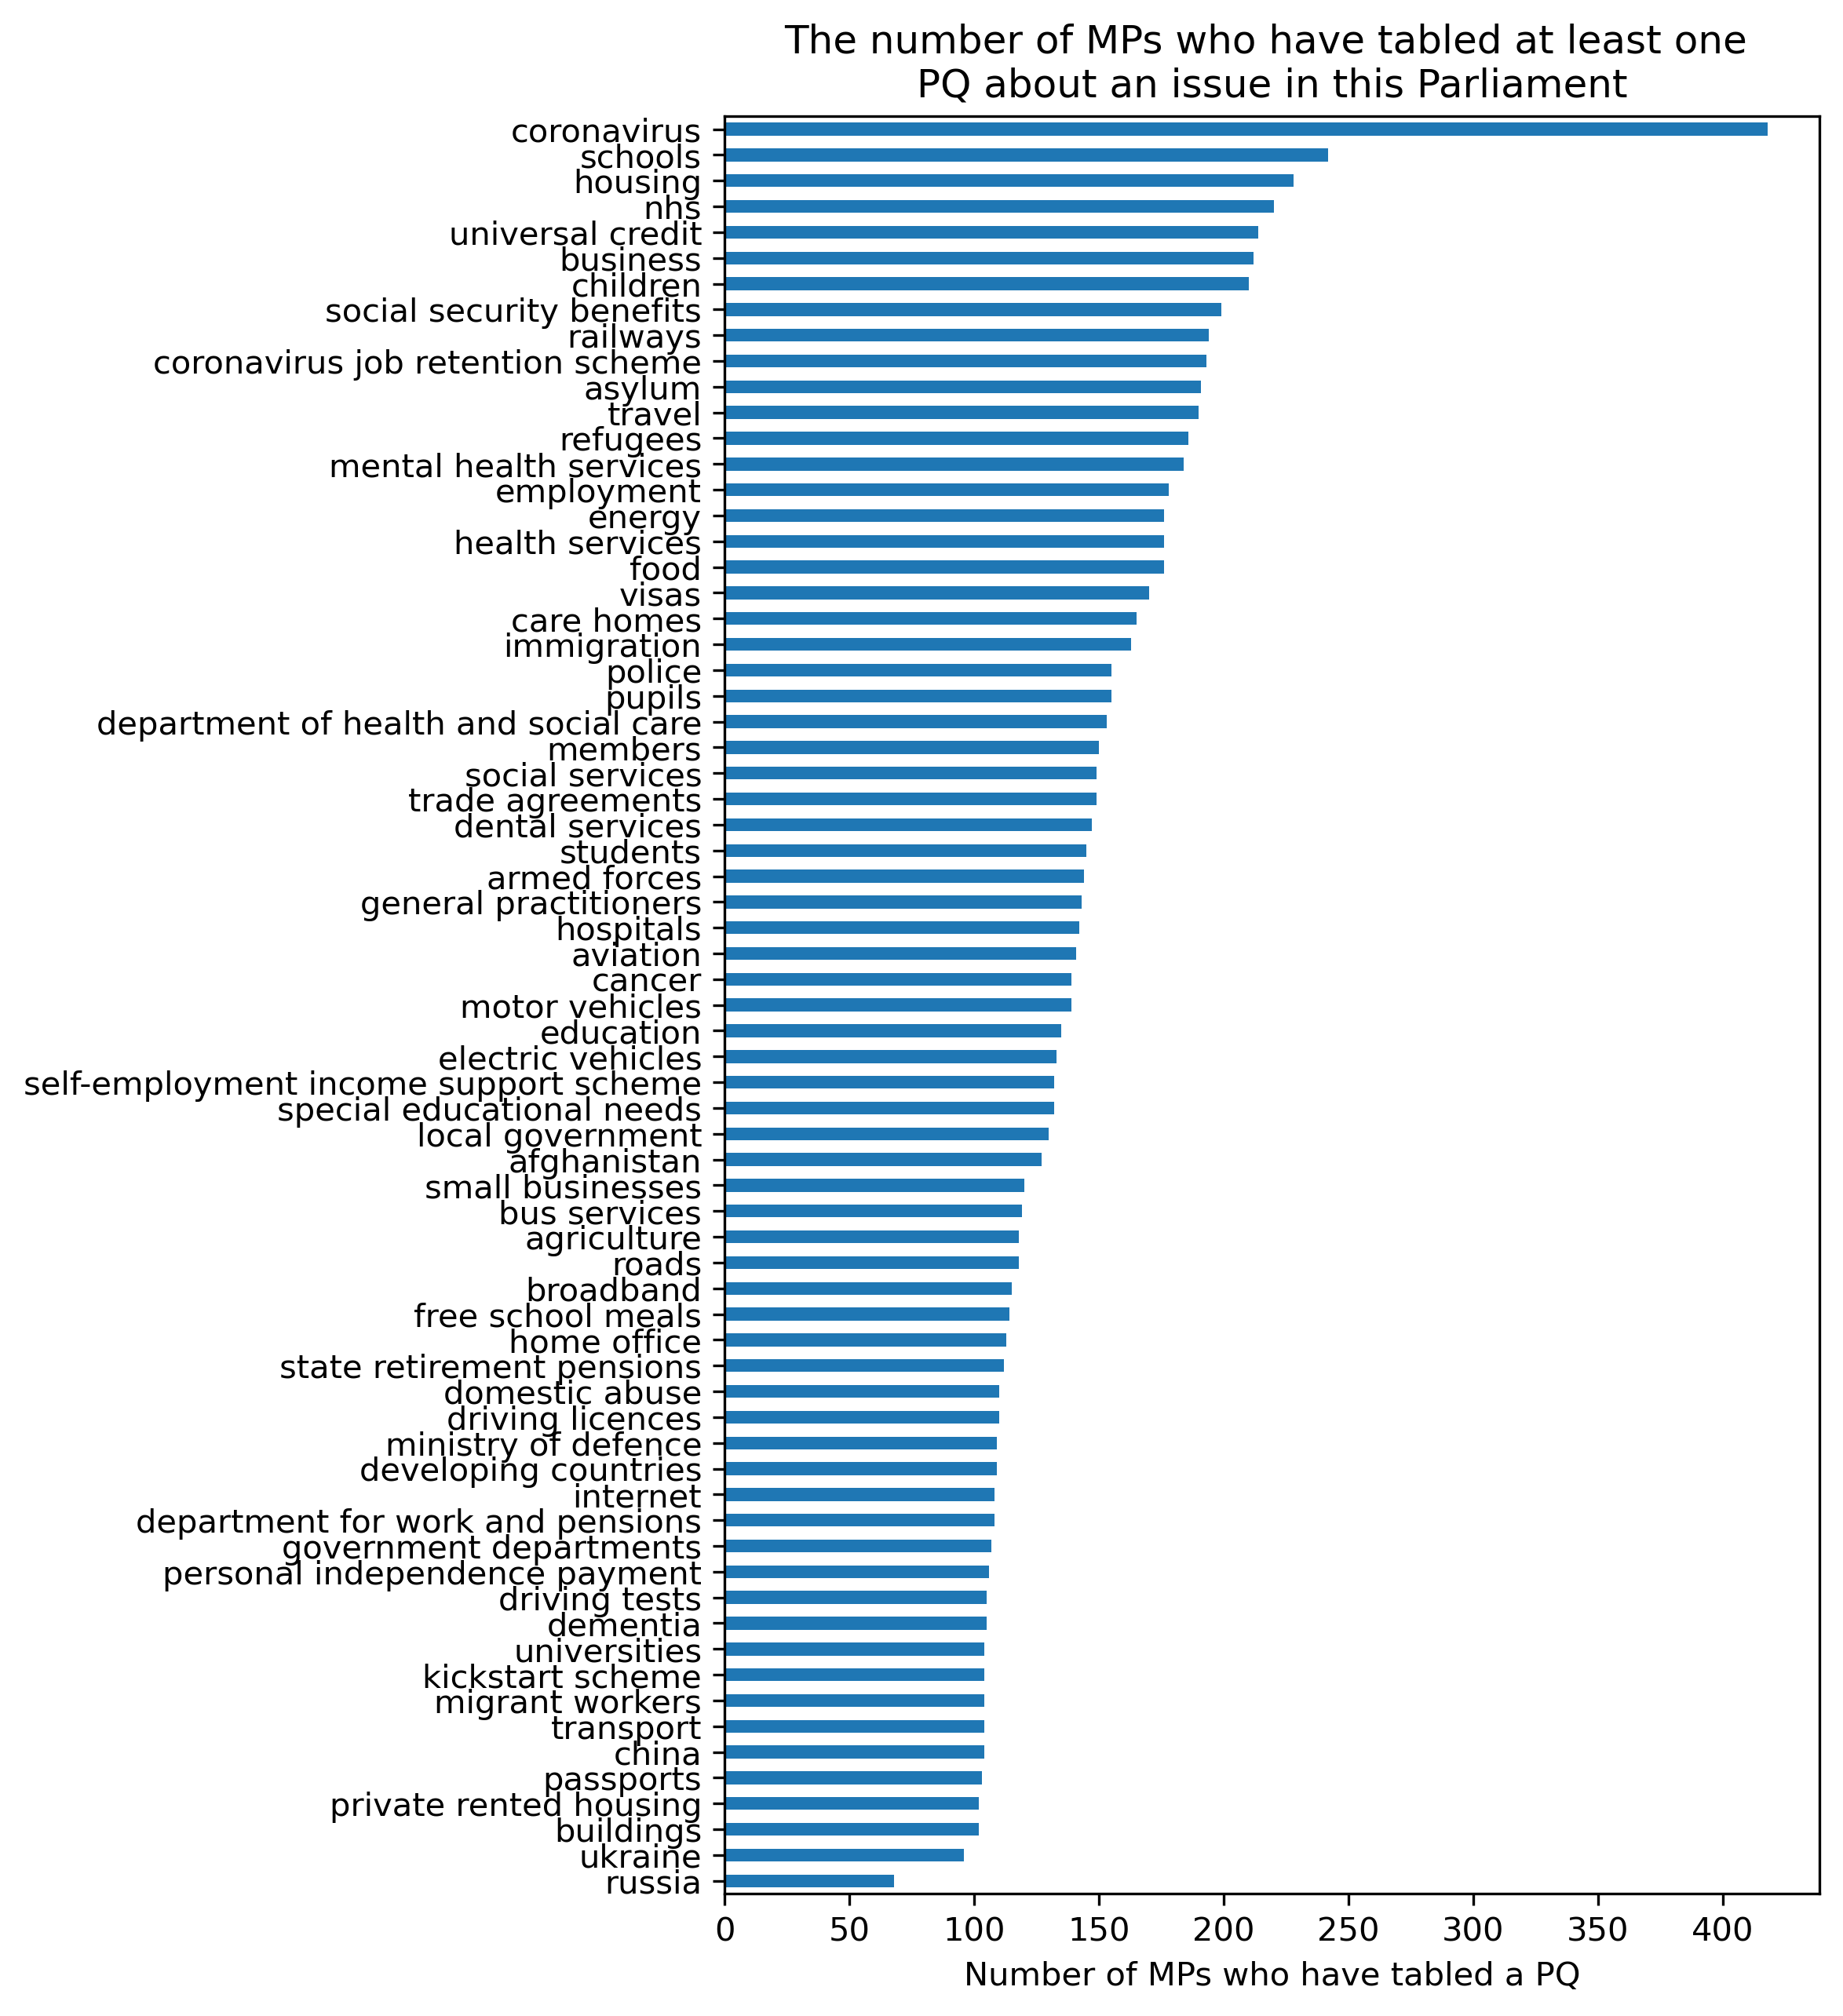

In [9]:
fig, ax = plt.subplots(figsize=(6, 10), dpi=300)

topics_members[topics_members.index.isin(topics)].plot(kind='barh', ax=ax, legend=False)
ax.set_title('The number of MPs who have tabled at least one \nPQ about an issue in this Parliament')
ax.set_ylabel('')
ax.set_xlabel('Number of MPs who have tabled a PQ')
plt.savefig('pq_plots/issues_mps.png', bbox_inches = 'tight')
plt.show()

Looking at individual issues.

In [10]:
pqs_sel.head()

,id,askingMemberId,askingMember,house,memberHasInterest,dateTabled,dateForAnswer,uin,questionText,answeringBodyId,answeringBodyName,heading,latestPartyabbreviation,topic,year_month,cleanedQuestion
251446,1172089,4658,NaN,Commons,False,2020-01-20,2020-01-22T00:00:00,5531,to ask the secretary of state for the home dep...,1,Home Office,animal experiments,Lab,animal experiments,2020-01,with reference to the statistics of scientifi...
251447,1172311,373,NaN,Commons,False,2020-01-21,2020-01-23T00:00:00,6016,"to ask the secretary of state for digital, cul...",10,"Department for Digital, Culture, Media and Sport",biometrics: private companies,Con,biometrics,2020-01,what plans his department has in place for the...
251448,1172949,4473,NaN,Commons,False,2020-01-23,2020-01-28T00:00:00,7256,to ask the secretary of state for the home dep...,1,Home Office,offences against children: victims,Lab,offences against children,2020-01,what plans she has to create pardonable offen...
251449,1174956,4473,NaN,Commons,False,2020-01-30,2020-02-03T00:00:00,10413,to ask the secretary of state for the home dep...,1,Home Office,home office: reviews,Lab,home office,2020-01,if she will publish the titles of the reviews...
251450,1174952,4473,NaN,Commons,False,2020-01-30,2020-02-03T00:00:00,10412,to ask the secretary of state for the home dep...,1,Home Office,home office: reviews,Lab,home office,2020-01,if she will publish the titles of the reports...


In [11]:
tipm = pqs_sel.groupby(['dateTabled', 'topic', 'latestPartyabbreviation']).nunique()[['id']].reset_index().set_index('dateTabled')
tipm = tipm[tipm.latestPartyabbreviation.isin(['Lab', 'Con', 'SNP', 'LD'])]
tipm = tipm[tipm.topic.isin(topics)]

In [12]:
tipm = tipm.pivot(columns=['topic', 'latestPartyabbreviation'], values='id').fillna(0)

In [13]:
parties = ['Lab', 'Con', 'LD', 'SNP']
colours = ['r', 'blue', 'yellow', 'gold']

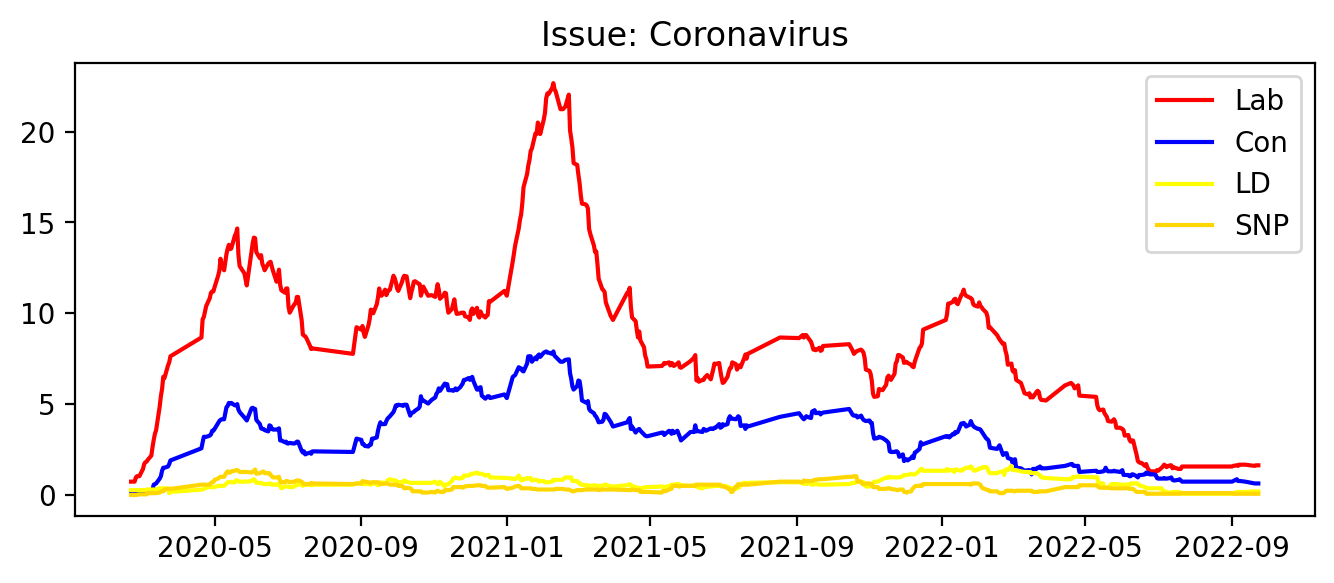

In [14]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'coronavirus'
plt_df = tipm[issue].rolling(30).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Issue: {}'.format(issue.title()))

plt.show()

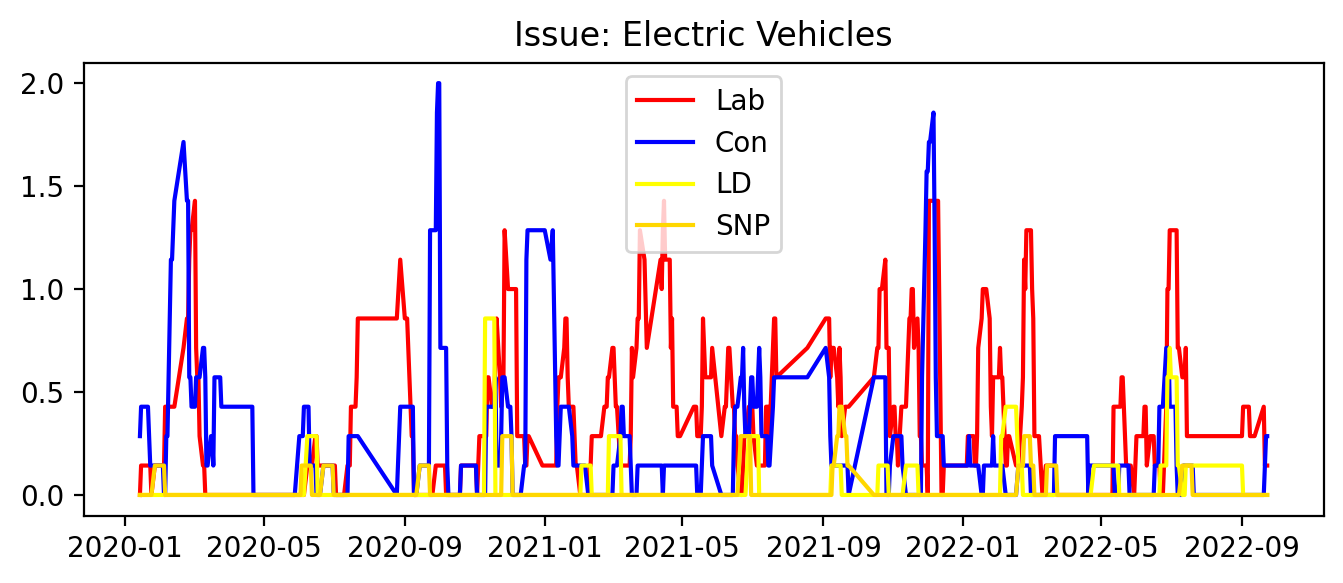

In [15]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'electric vehicles'
plt_df = tipm[issue].rolling(7).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Issue: {}'.format(issue.title()))

plt.show()

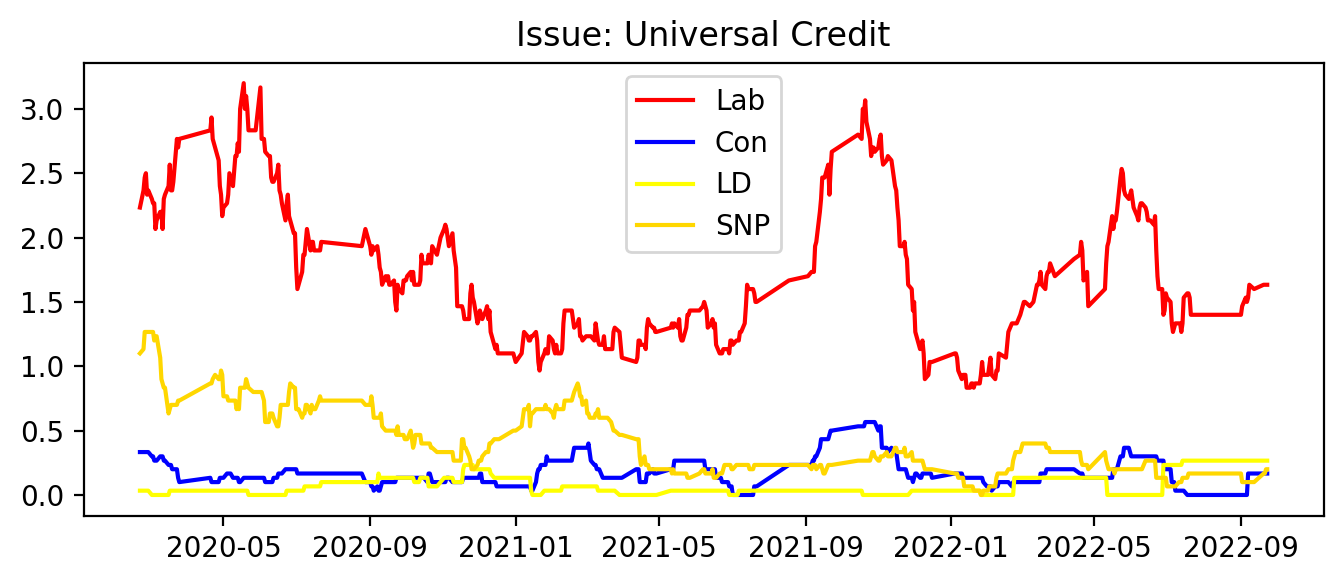

In [16]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'universal credit'
plt_df = tipm[issue].rolling(30).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Issue: {}'.format(issue.title()))

plt.show()

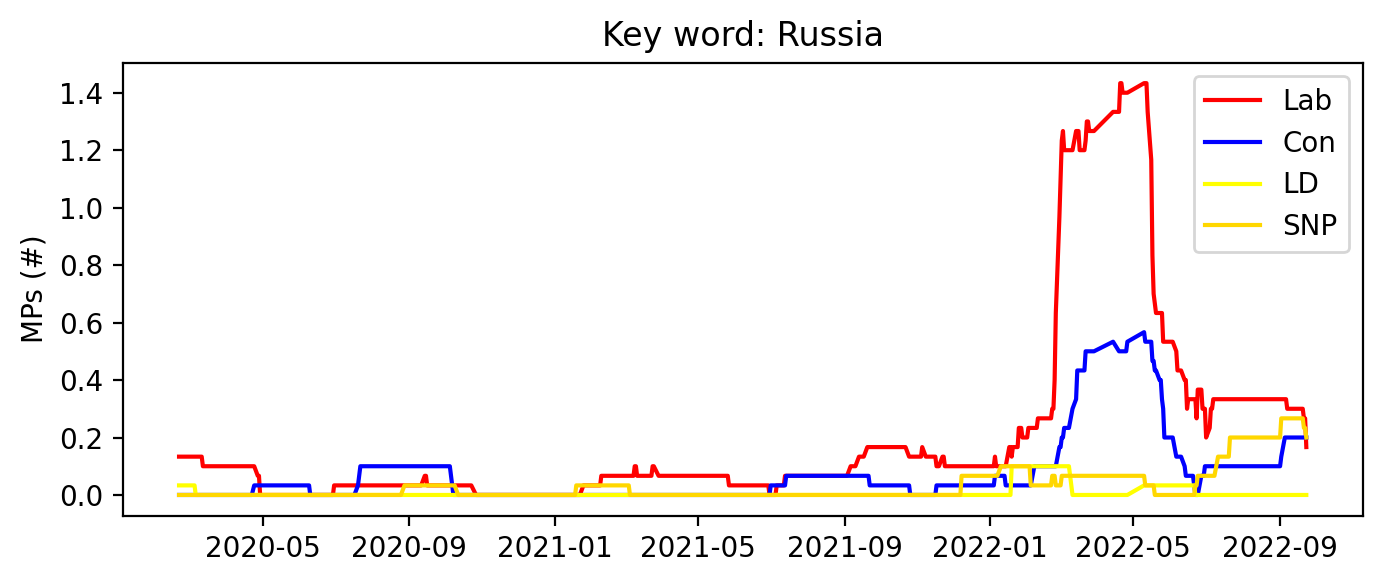

In [17]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'russia'
plt_df = tipm[issue].rolling(30).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Key word: {}'.format(issue.title()))
ax.set_ylabel('MPs (#)')


plt.show()

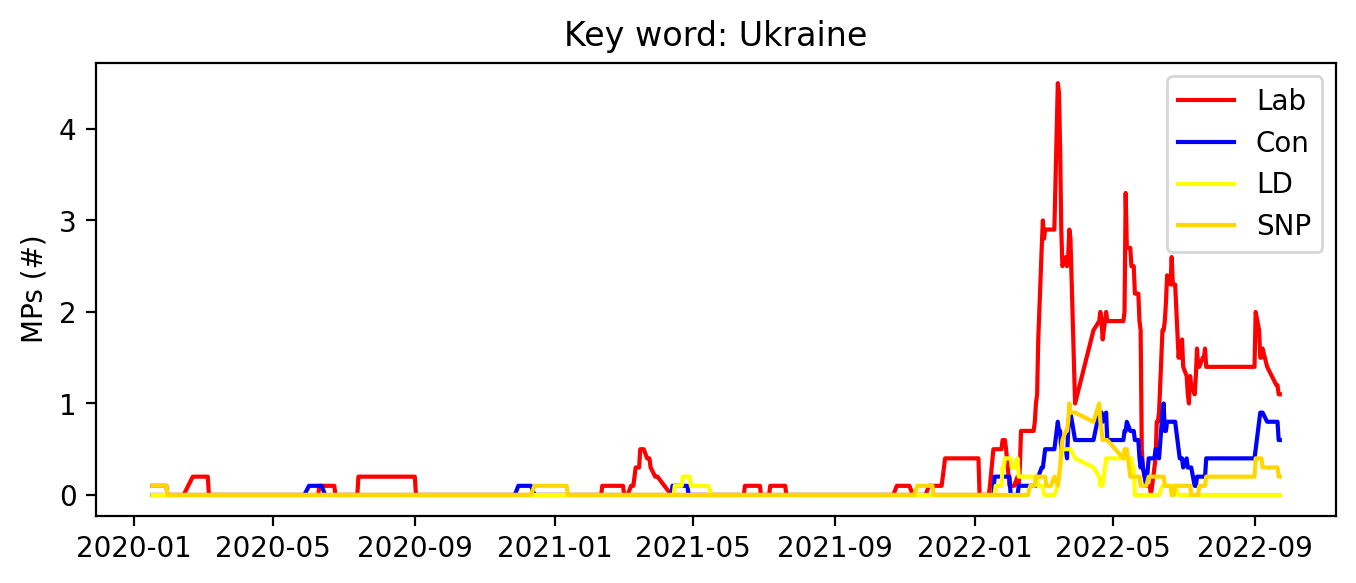

In [18]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'ukraine'
plt_df = tipm[issue].rolling(10).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Key word: {}'.format(issue.title()))
ax.set_ylabel('MPs (#)')


plt.show()

## Quesiton keyword tracking over time.

The formula below will take a keyword and track the number of MPs who have been tabling PQs containing that word or phrase over time, and break it down between the 4 main parties. 

In [19]:
def keyword_plot(issue, rolling_period = 0):
    fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

    pqs_n_sel = wpqs[wpqs.house == 'Commons']
    isel = pqs_n_sel[['dateTabled', 'askingMemberId', 'latestPartyabbreviation', 'cleanedQuestion']]
    isel = isel[isel.cleanedQuestion.str.contains(issue)]
    
    if rolling_period > 0:
        for i in range(len(parties)):
            ax.plot(isel[isel.latestPartyabbreviation == parties[i]].set_index(['dateTabled']).resample('M').nunique().rolling(rolling_period).mean().askingMemberId, c=colours[i], label=parties[i])
    else: 
        for i in range(len(parties)):
            ax.plot(isel[isel.latestPartyabbreviation == parties[i]].set_index(['dateTabled']).resample('M').nunique().askingMemberId, c=colours[i], label=parties[i])
    ax.legend()
    ax.set_title('Key word: {}'.format(issue.title()))
    ax.set_ylabel('Monthly MPs tabling PQs')

    return fig

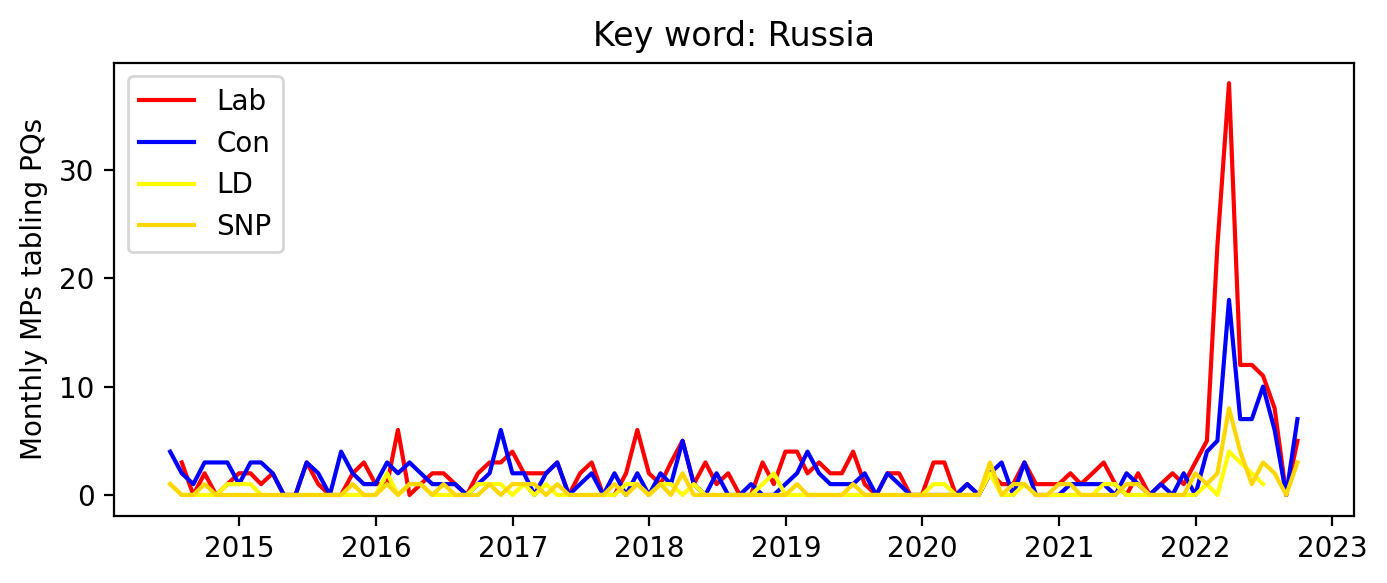

In [20]:
keyword_plot('russia')
plt.savefig('pq_plots/russia.png')
plt.show()

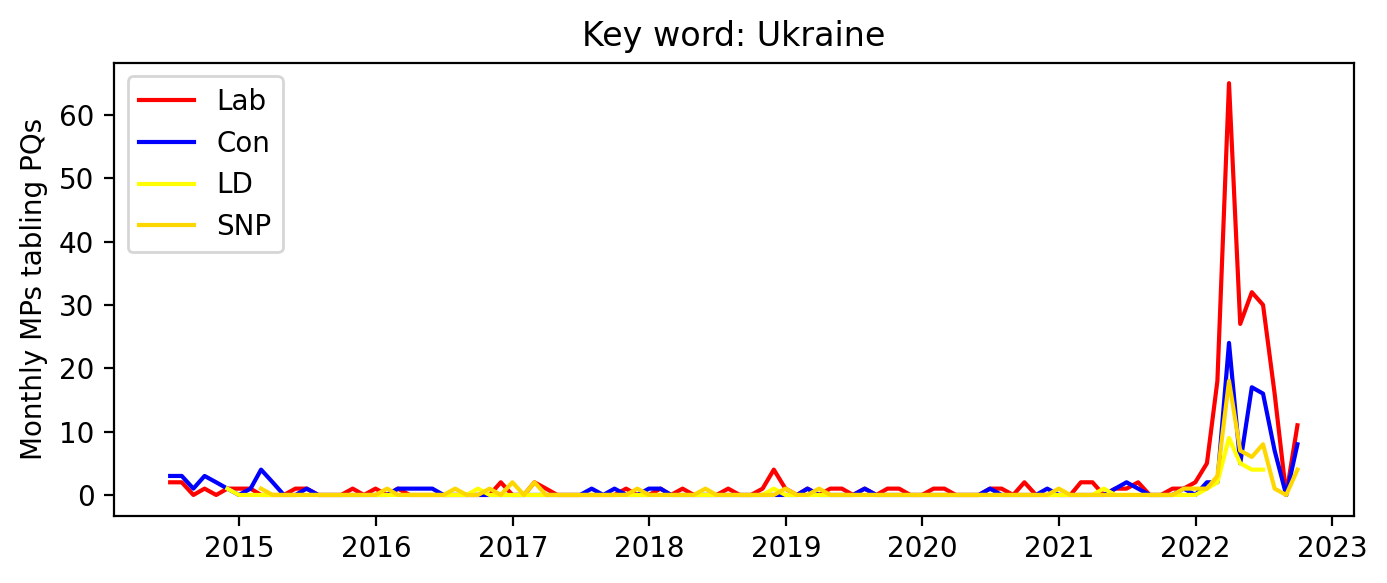

In [21]:
keyword_plot('ukraine')
plt.savefig('pq_plots/ukraine.png')
plt.show()

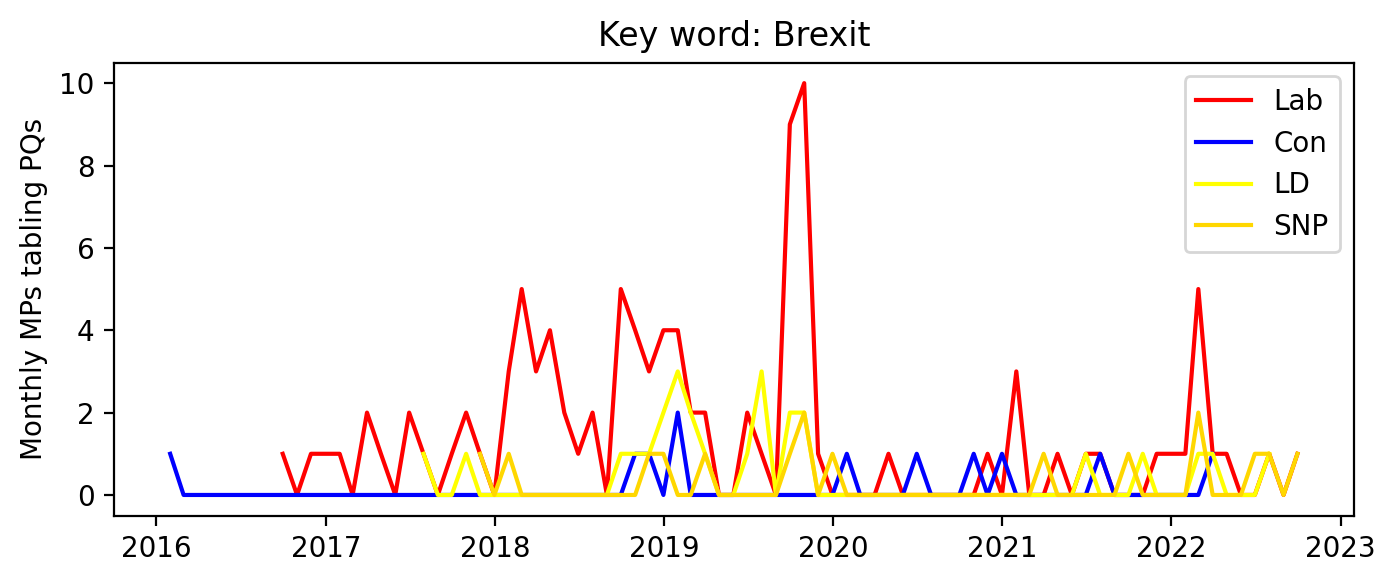

In [22]:
keyword_plot('brexit')
plt.show()


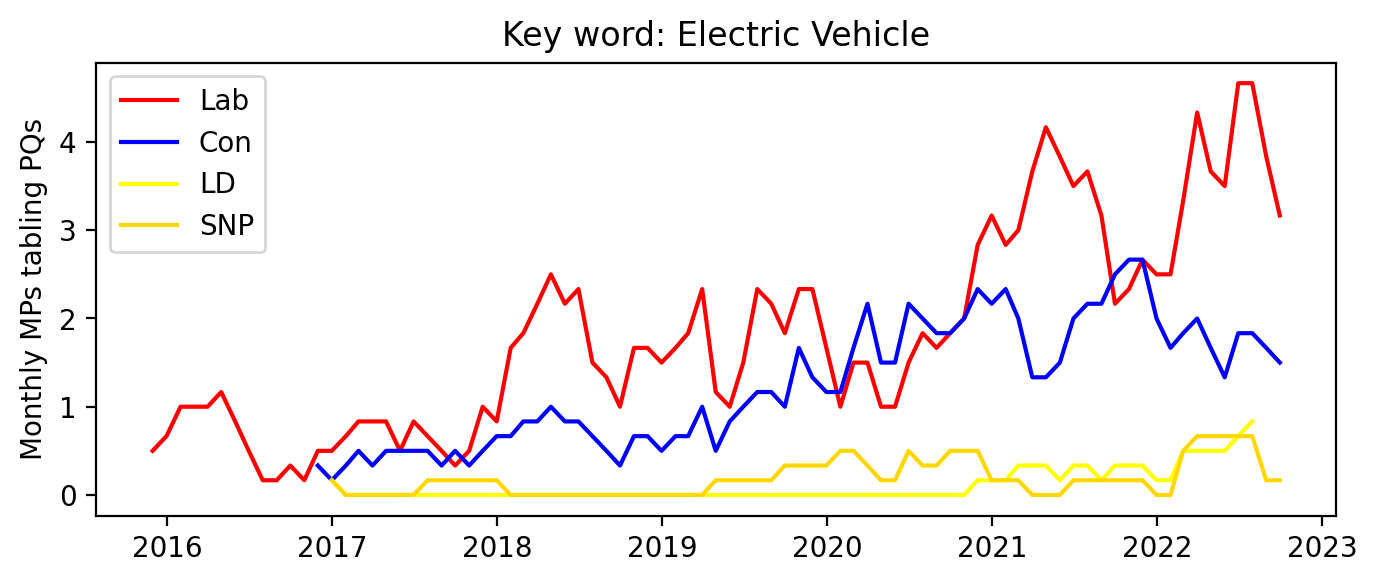

In [23]:
keyword_plot('electric vehicle', rolling_period=6)
plt.savefig('pq_plots/evs.png')
plt.show()

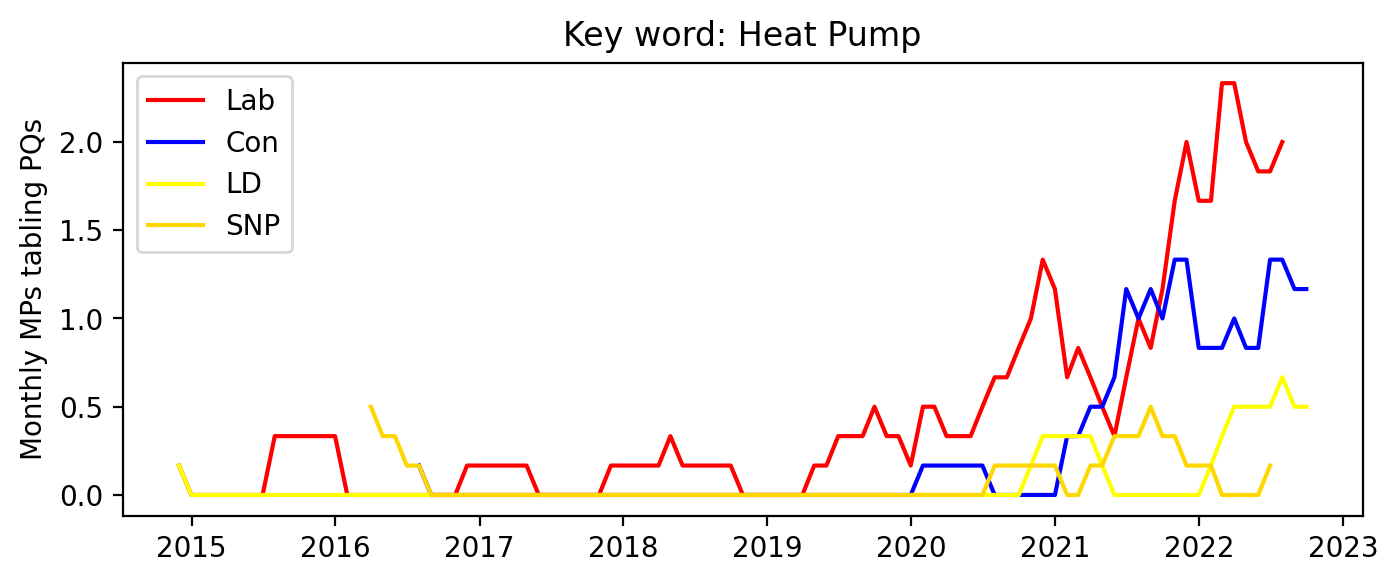

In [24]:
keyword_plot('heat pump', rolling_period=6)
plt.savefig('pq_plots/hp.png')
plt.show()

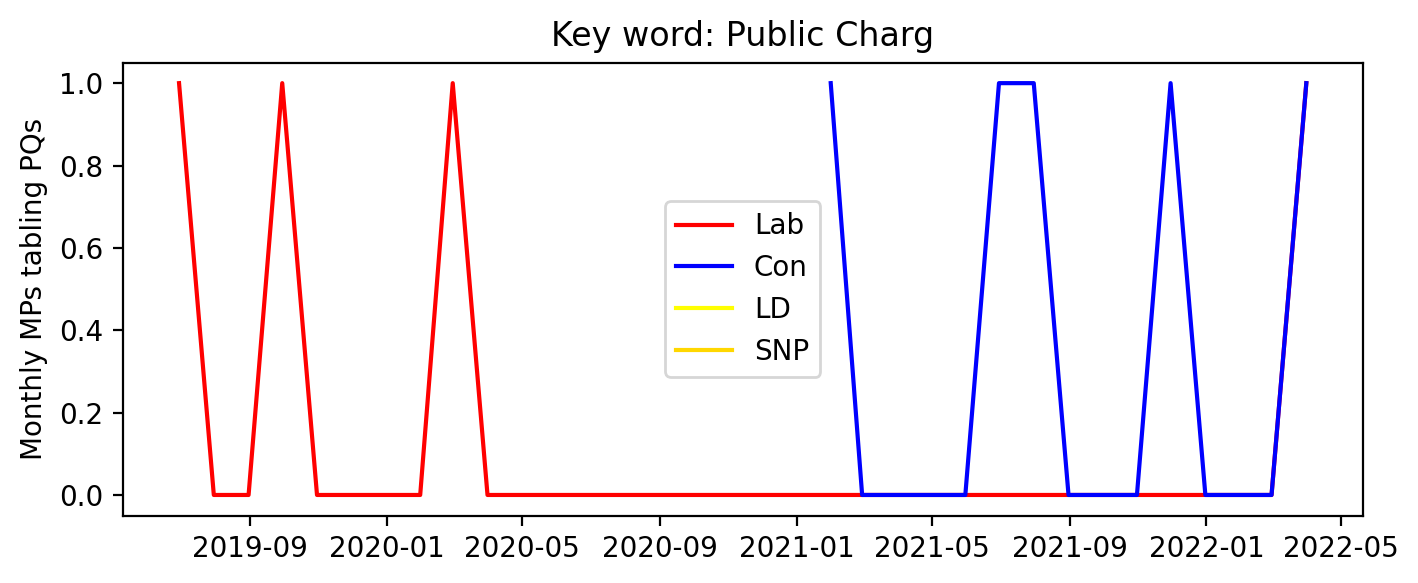

In [25]:
keyword_plot('public charg')
plt.show()

In [26]:
wpqs[wpqs.cleanedQuestion.str.contains('public charg')]

,id,askingMemberId,askingMember,house,memberHasInterest,dateTabled,dateForAnswer,uin,questionText,answeringBodyId,answeringBodyName,heading,latestPartyabbreviation,topic,year_month,cleanedQuestion
102249,638260,4230,NaN,Lords,False,2016-11-17,2016-12-01T00:00:00,HL3330,"to ask her majesty’s government, further to th...",27,Department for Transport,electric vehicles: charging points,LD,electric vehicles,2016-11,further to the written answer by lord ahmad o...
104038,631017,4230,NaN,Lords,False,2016-11-07,2016-11-21T00:00:00,HL3036,to ask her majesty’s government what is their ...,27,Department for Transport,electric vehicles: charging points,LD,electric vehicles,2016-11,what is their policy on charges levied for the...
234171,1132409,1436,NaN,Commons,False,2019-06-17,2019-06-20T00:00:00,265457,"to ask the secretary of state for transport, w...",27,Department for Transport,electric vehicles: charging points,Lab,electric vehicles,2019-06,what steps is he taking to ensure a uniform me...
245645,1143548,3999,NaN,Commons,False,2019-09-02,2019-09-05T00:00:00,285252,"to ask the secretary of state for transport, w...",27,Department for Transport,electric vehicles: charging points,Lab,electric vehicles,2019-09,what plans he has to help ensure that more pub...
259774,1176366,62,NaN,Commons,False,2020-02-05,2020-02-10T00:00:00,12826,"to ask the secretary of state for transport, w...",27,Department for Transport,electric vehicles: charging points,Lab,electric vehicles,2020-02,what plans his department has to introduce sta...
266340,1192008,4230,NaN,Lords,False,2020-04-30,2020-05-15T00:00:00,HL3805,to ask her majesty's government what progress ...,27,Department for Transport,electric vehicles: charging points,LD,electric vehicles,2020-04,what progress they have made towards encouragi...
306886,1250313,4776,NaN,Commons,False,2020-11-10,2020-11-12T00:00:00,113652,"to ask the secretary of state for transport, w...",27,Department for Transport,electric vehicles: charging points,LD,electric vehicles,2020-11,what assessment he has made of the effect of a...
306887,1250312,4776,NaN,Commons,False,2020-11-10,2020-11-12T00:00:00,113651,"to ask the secretary of state for transport, h...",27,Department for Transport,electric vehicles: charging points,LD,electric vehicles,2020-11,how many charging network providers for electr...
319282,1274708,4110,NaN,Commons,False,2021-01-08,2021-01-13T00:00:00,134425,"to ask the secretary of state for transport, w...",27,Department for Transport,electric vehicles: charging points,Con,electric vehicles,2021-01,whether he has made an assessment of public ch...
320727,1288316,3526,NaN,Lords,False,2021-02-22,2021-03-08T00:00:00,HL13364,to ask her majesty's government how many publi...,27,Department for Transport,electric vehicles: charging points,Lab,electric vehicles,2021-02,how many public charging points for electric v...


In [ ]:
wpqs.